# Nama : Bondan Banuaji
# NIM : 231351030
# Jurusan : Informatika Pagi B

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Pinjaman.csv')

In [3]:
df.head()

,Usia,Pendapatan,Status_Perkawinan,Jumlah_Pinjaman,Durasi_Pinjaman,Status_Pekerjaan,Lulus_Kredit
0,25,40,Belum Menikah,50,5,Karyawan Tetap,Tidak Layak
1,45,100,Menikah,80,10,Wirausaha,Layak
2,35,60,Menikah,100,15,Karyawan Kontrak,Tidak Layak
3,28,75,Belum Menikah,60,7,Karyawan Tetap,Layak
4,50,120,Menikah,150,20,Wirausaha,Layak


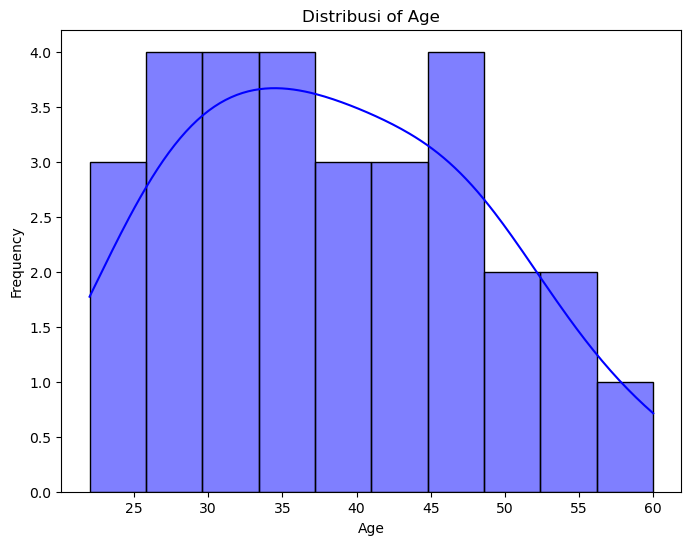

In [4]:
plt.figure(figsize=(8,6))
sns.histplot(df['Usia'], bins=10, kde=True, color='blue')
plt.title('Distribusi of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_28087/1738756283.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Lulus_Kredit', y='Pendapatan', data=df, palette='Set2')


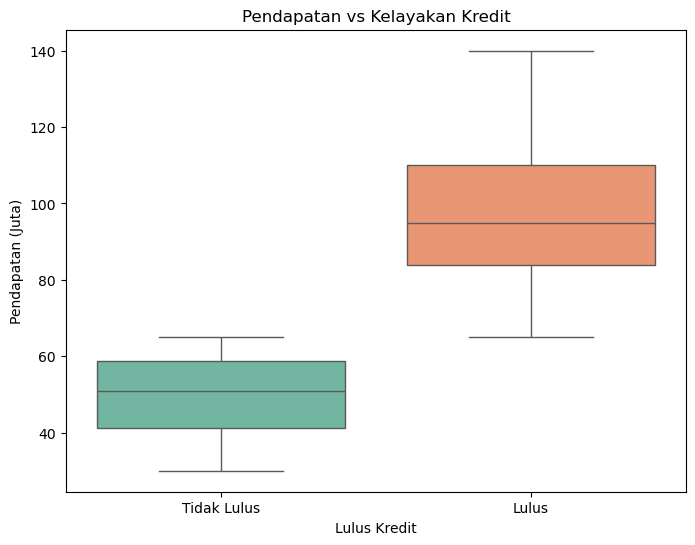

In [5]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Lulus_Kredit', y='Pendapatan', data=df, palette='Set2')
plt.title('Pendapatan vs Kelayakan Kredit')
plt.xlabel('Lulus Kredit')
plt.ylabel('Pendapatan (Juta)')
plt.xticks(ticks=[0, 1], labels=['Tidak Lulus', 'Lulus'])
plt.show()

/tmp/ipykernel_28087/4104659457.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status_Perkawinan', data=df, palette='Set2')


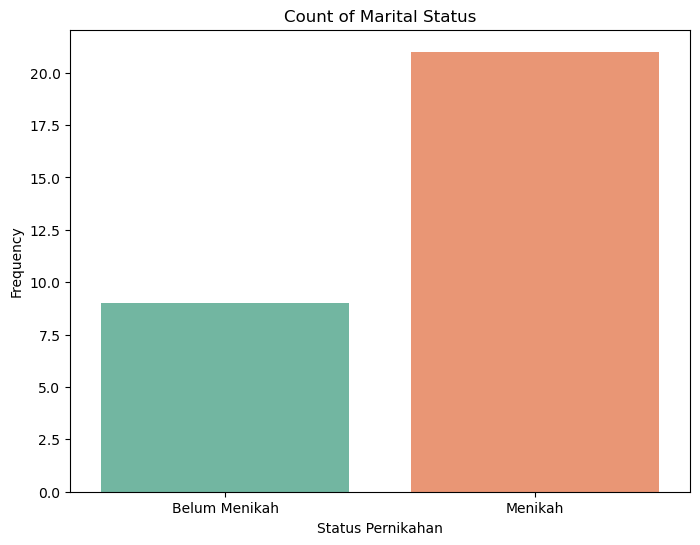

In [6]:
plt.figure(figsize=(8,6))
sns.countplot(x='Status_Perkawinan', data=df, palette='Set2')
plt.title('Count of Marital Status')
plt.xticks(ticks=[0, 1], labels=['Belum Menikah', 'Menikah'])
plt.xlabel('Status Pernikahan')
plt.ylabel('Frequency')
plt.show()


/tmp/ipykernel_28087/2994929819.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Lulus_Kredit', y='Jumlah_Pinjaman', data=df, palette='Set2')


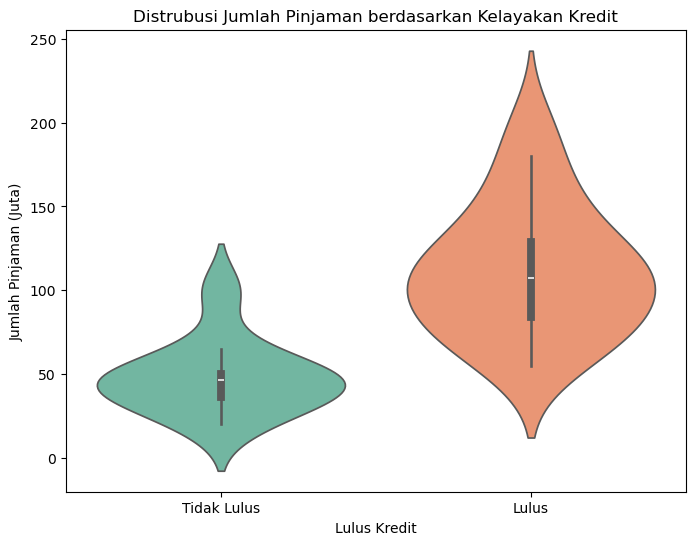

In [7]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Lulus_Kredit', y='Jumlah_Pinjaman', data=df, palette='Set2')
plt.title('Distrubusi Jumlah Pinjaman berdasarkan Kelayakan Kredit')
plt.xlabel('Lulus Kredit')
plt.ylabel('Jumlah Pinjaman (Juta)')
plt.xticks(ticks=[0, 1], labels=['Tidak Lulus', 'Lulus'])
plt.show()

In [8]:
label_encoder_status_perkawinan = LabelEncoder()
label_encoder_status_pekerjaan = LabelEncoder()
label_encoder_lulus_kredit = LabelEncoder()

In [9]:
df['Status_Perkawinan'] = label_encoder_status_perkawinan.fit_transform(df['Status_Perkawinan'])
df['Status_Pekerjaan'] = label_encoder_status_pekerjaan.fit_transform(df['Status_Pekerjaan'])
df['Lulus_Kredit'] = label_encoder_lulus_kredit.fit_transform(df['Lulus_Kredit'])

print(df.head())


   Usia  Pendapatan  Status_Perkawinan  Jumlah_Pinjaman  Durasi_Pinjaman  \
0    25          40                  0               50                5   
1    45         100                  1               80               10   
2    35          60                  1              100               15   
3    28          75                  0               60                7   
4    50         120                  1              150               20   

   Status_Pekerjaan  Lulus_Kredit  
0                 1             1  
1                 3             0  
2                 0             1  
3                 1             0  
4                 3             0  


In [10]:
df.to_csv('Pinjaman_modif.csv', index=False)

In [11]:
x = df.drop(columns=['Lulus_Kredit'])
y = df['Lulus_Kredit']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)   

In [13]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
y_pred = knn_model.predict(X_test)

In [15]:
# Example
# [Usia : 30, 
# Pendapatan : 80 juta,
# Status_Perkawinan : 0,
# Jumlah Pinjaman : 70 Juta,
# Durasi Pinjaman : 10,
# Status_Pekerjaan : 1]

new_data = np.array([[30, 80, 0, 70, 10, 1]])
new_pred = knn_model.predict(new_data)

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [16]:
print('Hasil Prediksi: ', new_pred)

Hasil Prediksi:  [0]


In [17]:
label_encoder_lulus_kredit.inverse_transform(new_pred)

array(['Layak'], dtype=object)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [19]:
import pickle

filename = 'knn_pinjam_mod.pkl'
pickle.dump(knn_model, open(filename, 'wb'))